<a href="https://colab.research.google.com/github/ashutoshb206/Linear_regression/blob/main/Linear_regression_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build Linear Regression Model in Python**

Inspired by [scikit-learn's Linear Regression Example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)

---

## **Load the Diabetes dataset** (via scikit-learn)

### **Import library**


In [38]:
from sklearn import datasets
import pandas as pd

### **Load dataset**

In [35]:
diabetes = datasets.load_diabetes()

In [40]:
# get a jist of the data - describe
data = datasets.load_diabetes()

# Convert to DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Now use describe()
print(df.describe())

                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17  
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

### **Description of the Diabetes dataset**

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

### **Feature names**

In [5]:
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### **Create X and Y data matrices**

In [6]:
X = diabetes.data
Y = diabetes.target

In [7]:
X.shape, Y.shape

((442, 10), (442,))

### **Load dataset + Create X and Y data matrices (in 1 step)**

In [8]:
X, Y = datasets.load_diabetes(return_X_y=True)

In [9]:
X.shape, Y.shape

((442, 10), (442,))

## **Data split**

### **Import library**

In [10]:
from sklearn.model_selection import train_test_split

### **Perform 80/20 Data split**

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### **Data dimension**

In [12]:
X_train.shape, Y_train.shape

((353, 10), (353,))

In [13]:
X_test.shape, Y_test.shape

((89, 10), (89,))

## **Linear Regression Model**

### **Import library**

In [14]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

### **Build linear regression**

#### Defines the regression model

In [15]:
model = linear_model.LinearRegression()

#### Build training model

In [16]:
model.fit(X_train, Y_train)

LinearRegression()

#### Apply trained model to make prediction (on test set)

In [17]:
Y_pred = model.predict(X_test)

## **Prediction results**

### **Print model performance**

In [18]:
print('Coefficients:', model.coef_) # each value tells how much that feature affects the prediction.
print('Intercept:', model.intercept_)  # value of prediction when all feature values are 0
print('Mean squared error (MSE): %.2f' # Measures average squared difference between actual and predicted values. - lower mse = better model
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'  # shows how perfect the model is - 1 = perfect, 0 = no better than mean, -ve = worse than mean
      % r2_score(Y_test, Y_pred))

Coefficients: [ -13.49745102 -208.91533266  497.45663945  323.63059008 -871.03600924
  569.3943539   100.98381903  131.10465823  696.23704649  116.2188029 ]
Intercept: 153.8987490499037
Mean squared error (MSE): 2891.21
Coefficient of determination (R^2): 0.61


### **String formatting**

By default r2_score returns a floating number ([more details](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html))

In [19]:
r2_score(Y_test, Y_pred)

0.6053792943414896

In [20]:
type(r2_score(Y_test, Y_pred))


float

We will be using the modulo operator to format the numbers by rounding it off.

In [21]:
'%f' % 0.523810833536016

'0.523811'

We will now round it off to 3 digits

In [22]:
'%.3f' % 0.523810833536016

'0.524'

We will now round it off to 2 digits

In [23]:
'%.2f' % 0.523810833536016

'0.52'

## **Scatter plots**

### **Import library**

In [24]:
import seaborn as sns

### **Make scatter plot**

#### The Data

In [25]:
Y_test

array([272.,  85., 249., 101.,  63.,  75.,  53.,  67., 146.,  50.,  65.,
       142., 127.,  94.,  72.,  77., 275.,  87., 178., 281.,  53.,  90.,
       164.,  68.,  40., 143., 246., 248., 306., 252., 144.,  51., 198.,
       272., 288.,  97.,  88., 183., 111., 196.,  55., 280., 303., 233.,
       122., 252.,  44., 202., 281., 131., 261., 275., 126.,  49., 295.,
        55.,  66., 135., 118.,  96., 103.,  70., 219.,  49., 243.,  59.,
       341.,  48.,  72., 104., 139., 164.,  77., 277.,  81., 179., 177.,
       281., 215., 241.,  91.,  57.,  88., 129.,  78.,  53., 118.,  93.,
        42.])

In [26]:
import numpy as np
np.array(Y_test)

array([272.,  85., 249., 101.,  63.,  75.,  53.,  67., 146.,  50.,  65.,
       142., 127.,  94.,  72.,  77., 275.,  87., 178., 281.,  53.,  90.,
       164.,  68.,  40., 143., 246., 248., 306., 252., 144.,  51., 198.,
       272., 288.,  97.,  88., 183., 111., 196.,  55., 280., 303., 233.,
       122., 252.,  44., 202., 281., 131., 261., 275., 126.,  49., 295.,
        55.,  66., 135., 118.,  96., 103.,  70., 219.,  49., 243.,  59.,
       341.,  48.,  72., 104., 139., 164.,  77., 277.,  81., 179., 177.,
       281., 215., 241.,  91.,  57.,  88., 129.,  78.,  53., 118.,  93.,
        42.])

In [27]:
Y_pred

array([236.69526204, 182.25462983, 203.6318744 , 102.2338615 ,
       126.20654082,  81.53632401, 122.39858469, 139.00331897,
       147.62370376, 146.41707112,  82.01884501, 188.72343719,
       170.1956076 , 165.1580936 , 103.55179485,  82.72499052,
       215.7927313 ,  89.03233058, 132.41861555, 197.98587979,
       106.1589505 , 106.81441976, 184.62414273, 119.37113824,
       142.59287923,  70.01700413, 156.0064366 , 196.56874027,
       240.2082428 , 161.18803324, 126.93314802, 127.13369456,
       205.70149747, 191.57600262, 209.91237482, 150.18609475,
       101.29223515, 118.19887739, 111.20014758, 157.93431971,
       153.29578208, 232.868877  , 257.2845271 , 194.89374968,
       173.9622517 , 236.52304845, 133.80200961, 195.28807141,
       247.24112558, 162.74024742, 235.12650068, 234.44099366,
       173.26677704, 103.99906683, 220.36535128,  79.72687696,
       127.46859671, 130.37497139, 163.32967991,  63.28314309,
       130.67568212, 176.36164052, 145.59287335,  95.35

#### Making the scatter plot

<Axes: >

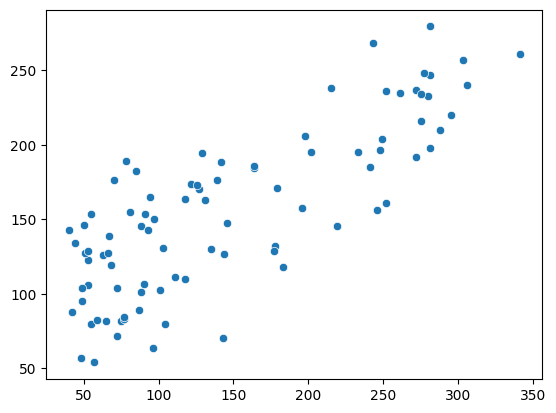

In [28]:
sns.scatterplot(x= Y_test,y= Y_pred)

<Axes: >

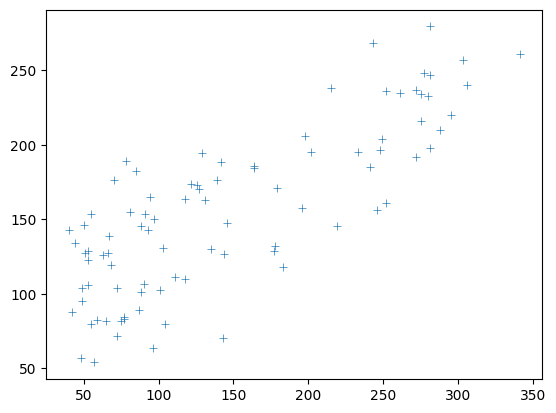

In [29]:
sns.scatterplot(x=Y_test, y=Y_pred, marker="+")

<Axes: >

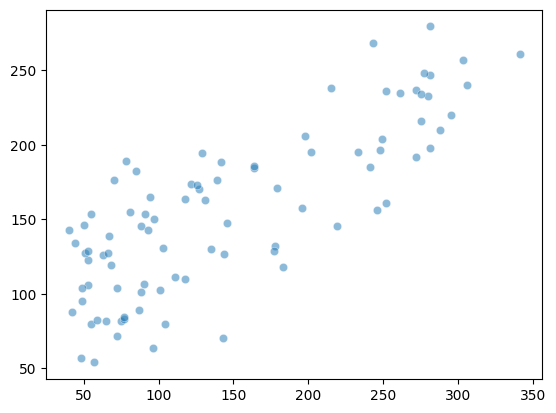

In [30]:
sns.scatterplot(x=Y_test, y=Y_pred, alpha=0.5)